# Data Loading

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv('DSFP.csv')
display(df.columns)
display(df.head())

Index(['FlareNumber', 'T_REC', 'NOAA_AR', 'QUALITY', 'Longitude', 'Latitude', 'TOTUSJH', 'TOTBSQ', 'TOTPOT', 'TOTUSJZ', 'ABSNJZH', 'SAVNCPP', 'USFLUX', 'AREA_ACR', 'TOTFZ', 'MEANPOT', 'R_VALUE', 'EPSZ', 'SHRGT45', 'MEANSHR', 'MEANGAM', 'MEANGBT', 'MEANGBZ', 'MEANGBH', 'MEANJZH', 'TOTFY', 'MEANJZD', 'MEANALP', 'TOTFX', 'EPSY', 'EPSX'], dtype='object')

,FlareNumber,T_REC,NOAA_AR,QUALITY,Longitude,Latitude,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,AREA_ACR,TOTFZ,MEANPOT,R_VALUE,EPSZ,SHRGT45,MEANSHR,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZH,TOTFY,MEANJZD,MEANALP,TOTFX,EPSY,EPSX
0,0,5/1/2010 23:48,11064,0,28,15,64.266,2.114200e+09,3.596094e+21,1.204120e+12,13.145,9.928430e+11,7.739207e+20,84.971283,114.63,2472.887,0.000,0.1028,5.114,22.459,33.214,159.145,160.266,76.708,-0.012005,-349.33,1.697619,-0.031377,285.80,0.1567,-0.1282
1,0,5/2/2010 23:48,11064,0,15,16,37.787,1.392500e+09,1.230179e+21,7.821380e+11,6.576,6.830600e+11,4.664249e+20,75.816551,145.99,1321.411,0.000,0.1989,1.284,17.857,29.207,152.084,158.553,66.027,-0.009381,-216.80,1.823444,-0.032041,7.22,0.1477,-0.0049
2,0,5/3/2010 23:48,11063,0,38,16,109.597,2.105100e+09,7.247206e+21,2.210140e+12,1.796,6.538780e+11,2.021575e+21,38.578773,-442.41,1712.285,2.564,-0.3986,3.201,22.242,28.947,102.453,102.625,39.314,0.000564,-102.16,-0.383748,0.001854,-470.04,0.0460,0.2118
3,0,5/3/2010 23:48,11064,0,2,15,15.710,1.124900e+09,6.198173e+20,4.025930e+11,0.977,3.413860e+11,1.920565e+20,32.439152,111.06,1292.837,0.000,0.1873,5.817,21.683,27.291,129.121,130.118,48.735,-0.002707,-152.54,1.768766,-0.014741,-123.05,0.1286,0.1037
4,0,5/3/2010 23:48,11065,0,16,32,36.136,9.150800e+08,2.181095e+21,9.585400e+11,0.947,8.611329e+10,7.971653e+20,30.968317,-140.80,1097.818,0.000,-0.2919,2.807,21.836,25.466,103.869,104.104,31.943,-0.000633,181.19,0.107664,-0.003386,-191.06,-0.1878,0.1980


In [2]:
#Create features (training data) for model
X = df[['Longitude', 'Latitude', 'TOTUSJH', 'TOTBSQ', 'TOTPOT', 'TOTUSJZ', 'ABSNJZH', 'SAVNCPP', 'USFLUX', 'AREA_ACR', 'TOTFZ', 'MEANPOT', 'R_VALUE', 'EPSZ', 'SHRGT45', 'MEANSHR', 'MEANGAM', 'MEANGBT', 'MEANGBZ', 'MEANGBH', 'MEANJZH', 'TOTFY', 'MEANJZD', 'MEANALP', 'TOTFX', 'EPSY', 'EPSX']]
X = X.fillna(0)
X.head()

,Longitude,Latitude,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,AREA_ACR,TOTFZ,MEANPOT,R_VALUE,EPSZ,SHRGT45,MEANSHR,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZH,TOTFY,MEANJZD,MEANALP,TOTFX,EPSY,EPSX
0,28,15,64.266,2.114200e+09,3.596094e+21,1.204120e+12,13.145,9.928430e+11,7.739207e+20,84.971283,114.63,2472.887,0.000,0.1028,5.114,22.459,33.214,159.145,160.266,76.708,-0.012005,-349.33,1.697619,-0.031377,285.80,0.1567,-0.1282
1,15,16,37.787,1.392500e+09,1.230179e+21,7.821380e+11,6.576,6.830600e+11,4.664249e+20,75.816551,145.99,1321.411,0.000,0.1989,1.284,17.857,29.207,152.084,158.553,66.027,-0.009381,-216.80,1.823444,-0.032041,7.22,0.1477,-0.0049
2,38,16,109.597,2.105100e+09,7.247206e+21,2.210140e+12,1.796,6.538780e+11,2.021575e+21,38.578773,-442.41,1712.285,2.564,-0.3986,3.201,22.242,28.947,102.453,102.625,39.314,0.000564,-102.16,-0.383748,0.001854,-470.04,0.0460,0.2118
3,2,15,15.710,1.124900e+09,6.198173e+20,4.025930e+11,0.977,3.413860e+11,1.920565e+20,32.439152,111.06,1292.837,0.000,0.1873,5.817,21.683,27.291,129.121,130.118,48.735,-0.002707,-152.54,1.768766,-0.014741,-123.05,0.1286,0.1037
4,16,32,36.136,9.150800e+08,2.181095e+21,9.585400e+11,0.947,8.611329e+10,7.971653e+20,30.968317,-140.80,1097.818,0.000,-0.2919,2.807,21.836,25.466,103.869,104.104,31.943,-0.000633,181.19,0.107664,-0.003386,-191.06,-0.1878,0.1980


In [3]:
# Create targets (correct predictions) for model
y = df['FlareNumber']
y = y.map(dict({1:True, 0:False}))
y = y.fillna(0)
y

0       False
1       False
2       False
3       False
4       False
        ...  
8869     True
8870     True
8871     True
8872     True
8873     True
Name: FlareNumber, Length: 8874, dtype: bool

# Train Data Prep

In [4]:
from sklearn import preprocessing

#Split the model into several parts to train and test separate data. Also, apply a standardization scaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train_scaler = preprocessing.StandardScaler().fit(X_train)
X_test_scaler = preprocessing.StandardScaler().fit(X_test)

X_train = X_train_scaler.transform(X_train)
X_test = X_test_scaler.transform(X_test)

#Save copy for later
X_test_website_integration = X_test
y_test_website_integration = y_test

In [5]:
from time import time
from pathlib import Path
from sklearn.model_selection import GridSearchCV

#Function for finding best hyperparams for a model using GridSearchCV, given what kind of model it is and a parameter grid
def find_ideal_hyperparams(model, param_grid):

    instantiated_model = model

    gs_results = GridSearchCV(instantiated_model, param_grid, cv=5, verbose=True, error_score='raise').fit(X_train, y_train)

    results = pd.DataFrame(gs_results.cv_results_)
    results.loc[:, 'mean_test_score'] *= 100
    
    # take the most relevant columns and sort (for readability)
    #results = results.loc[:, ('rank_test_score', 'mean_test_score', 'params')]
    results.sort_values(by='rank_test_score', ascending=True, inplace=True)

    print(results.head())

    best_score = results['mean_test_score'].iloc[0]
    ideal_params = results['params'].iloc[0]
    
    return ideal_params

# SVC Train & Eval

In [6]:
from sklearn.svm import SVC
#Find best hyperparameters for SVC Model, and fit it to the data using those parameters
param_grid_svc = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10]  # Kernel coefficient (only for 'rbf', 'poly', and 'sigmoid')
}
svc_model = SVC(**find_ideal_hyperparams(SVC(), param_grid_svc))
svc_model.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C param_gamma param_kernel                                         params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
154       0.158835      0.012757         0.041012        0.002239     100        0.01          rbf     {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}           0.980986           0.988028           0.983803           0.985915           0.984496        98.464570        0.002332                1
21        0.588845      0.058466         0.023379        0.000665   0.001           1         poly     {'C': 0.001, 'gamma': 1, 'kernel': 'poly'}           0.980986           0.985915           0.983803           0.983803           0.982382        98.337780        0.001644                2
101       0.283963      0.034625         0.012188        0.00147

SVC(C=100, gamma=0.01)

In [7]:
svc_y_pred = svc_model.predict(X_test)

svc_accuracy = accuracy_score(y_test, svc_y_pred)
print(f'SVC accuracy: {svc_accuracy * 100:.2f}%\n')

print(classification_report(y_test, svc_y_pred))

SVC accuracy: 98.03%

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      1690
        True       0.85      0.72      0.78        85

    accuracy                           0.98      1775
   macro avg       0.92      0.86      0.88      1775
weighted avg       0.98      0.98      0.98      1775



# LSVC Train & Eval

In [8]:
from sklearn.svm import LinearSVC
#Find best hyperparameters for LSVC Model, and fit it to the data using those parameters
param_grid_lsvc = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2'],  # Regularization type
    'dual': [True, False],
    'max_iter': [1000, 2000, 3000, 5000]  # Adjust the values as needed
}
lsvc_model = LinearSVC(**find_ideal_hyperparams(LinearSVC(), param_grid_lsvc))
lsvc_model.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\logan\.conda\envs\hackathon24\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\logan\.conda\envs\hackathon24\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\logan\.conda\envs\hackathon24\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\logan\.conda\envs\hackathon24\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\logan\.conda\envs\hackathon24\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\logan\.conda\envs\hackathon24\Lib\site-packages\sklearn\svm\_

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C param_dual param_max_iter param_penalty                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
35       0.849486      0.115117         0.001937        0.000125      10       True           5000            l2  {'C': 10, 'dual': True, 'max_iter': 5000, 'pen...           0.969014           0.975352           0.978169           0.978873           0.968992        97.408014        0.004310                1
33       0.474308      0.032150         0.001379        0.000597      10       True           2000            l2  {'C': 10, 'dual': True, 'max_iter': 2000, 'pen...           0.968310           0.976761           0.976761           0.978169           0.969697        97.393939        0.004087                2
47       0.023260      0.002208         0.001499        0.000585     100 

C:\Users\logan\.conda\envs\hackathon24\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, dual=True, max_iter=5000)

In [9]:
lsvc_y_pred = lsvc_model.predict(X_test)

lsvc_accuracy = accuracy_score(y_test, lsvc_y_pred)
print(f'LSVC accuracy: {lsvc_accuracy * 100:.2f}%\n')

print(classification_report(y_test, lsvc_y_pred))

LSVC accuracy: 97.13%

              precision    recall  f1-score   support

       False       0.97      1.00      0.99      1690
        True       0.95      0.42      0.59        85

    accuracy                           0.97      1775
   macro avg       0.96      0.71      0.79      1775
weighted avg       0.97      0.97      0.97      1775



# GNB Train & Eval

In [10]:
from sklearn.naive_bayes import GaussianNB
#Find best hyperparameters for GNB Model, and fit it to the data using those parameters
param_grid_gnb = {}
gnb_model = GaussianNB(**find_ideal_hyperparams(GaussianNB(), param_grid_gnb))
gnb_model.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0       0.004993      0.001444         0.001616         0.00047     {}           0.907746           0.930986           0.928873           0.923239           0.905567        91.928247        0.010638                1


GaussianNB()

In [11]:
gnb_y_pred = gnb_model.predict(X_test)

gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
print(f'GNB accuracy: {gnb_accuracy * 100:.2f}%\n')

print(classification_report(y_test, gnb_y_pred))

GNB accuracy: 91.55%

              precision    recall  f1-score   support

       False       0.99      0.92      0.95      1690
        True       0.33      0.73      0.45        85

    accuracy                           0.92      1775
   macro avg       0.66      0.83      0.70      1775
weighted avg       0.95      0.92      0.93      1775



# BNB Train & Eval

In [12]:
from sklearn.naive_bayes import BernoulliNB
#Find best hyperparameters for BNB Model, and fit it to the data using those parameters
param_grid_bnb = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]  # Smoothing parameter
}
bnb_model = BernoulliNB(**find_ideal_hyperparams(BernoulliNB(), param_grid_bnb))
bnb_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha          params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0       0.006917      0.001557         0.002022        0.000613         0.1  {'alpha': 0.1}           0.814789           0.828169           0.838028           0.827465           0.804792        82.264856        0.011583                1
1       0.005789      0.001593         0.001194        0.000405         0.5  {'alpha': 0.5}           0.814085           0.827465           0.838028           0.827465           0.804792        82.236687        0.011617                2
2       0.006108      0.000815         0.001293        0.000514         1.0  {'alpha': 1.0}           0.812676           0.827465           0.838028           0.827465           0.803383        82.180329        0.012247          

BernoulliNB(alpha=0.1)

In [13]:
bnb_y_pred = bnb_model.predict(X_test)

bnb_accuracy = accuracy_score(y_test, bnb_y_pred)
print(f'BNB accuracy: {bnb_accuracy * 100:.2f}%\n')

print(classification_report(y_test, bnb_y_pred))

BNB accuracy: 82.54%

              precision    recall  f1-score   support

       False       0.99      0.82      0.90      1690
        True       0.19      0.84      0.31        85

    accuracy                           0.83      1775
   macro avg       0.59      0.83      0.61      1775
weighted avg       0.95      0.83      0.87      1775



# SGD Train & Eval

In [14]:
from sklearn.linear_model import SGDClassifier
#Find best hyperparameters for SGD Model, and fit it to the data using those parameters
param_grid_sgd = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization term
    'penalty': ['l1', 'l2', 'elasticnet'],  # Penalty type
    'l1_ratio': [0.15, 0.5, 0.85],  # Mixing parameter for elastic net penalty
    'max_iter': [1000, 2000, 3000]  # Maximum number of iterations
}
sgd_model = SGDClassifier(**find_ideal_hyperparams(SGDClassifier(), param_grid_sgd))
sgd_model.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha param_l1_ratio param_max_iter param_penalty                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
50       0.028144      0.005903         0.001179        0.000233       0.001           0.85           2000    elasticnet  {'alpha': 0.001, 'l1_ratio': 0.85, 'max_iter':...           0.969718           0.976761           0.972535           0.977465           0.971106        97.351706        0.003076                1
49       0.018333      0.003113         0.001217        0.000517       0.001           0.85           2000            l2  {'alpha': 0.001, 'l1_ratio': 0.85, 'max_iter':...           0.965493           0.977465           0.976761           0.978169           0.968992        97.337591        0.005148    

SGDClassifier(alpha=0.001, l1_ratio=0.85, max_iter=2000, penalty='elasticnet')

In [15]:
sgd_y_pred = sgd_model.predict(X_test)

sgd_accuracy = accuracy_score(y_test, sgd_y_pred)
print(f'SGD accuracy: {sgd_accuracy * 100:.2f}%\n')

print(classification_report(y_test, sgd_y_pred))

SGD accuracy: 97.63%

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1690
        True       0.92      0.55      0.69        85

    accuracy                           0.98      1775
   macro avg       0.95      0.78      0.84      1775
weighted avg       0.98      0.98      0.97      1775



# Visualization & Comparison

In [16]:
model_names = ['SVC', 'LinearSVC', 'GaussianNB', 'BernoulliNB', 'SGD']

metrics_dict = {'precision': {}, 'recall': {}, 'f1-score': {}}

y_preds = {
    'SVC': svc_y_pred,
    'LinearSVC': lsvc_y_pred,
    'GaussianNB': gnb_y_pred,
    'BernoulliNB': bnb_y_pred,
    'SGD': sgd_y_pred
}

for model_name in model_names:
    #print(report)
    report = classification_report(y_test, y_preds[model_name], output_dict=True)
    metrics_dict['precision'][model_name] = {'False': report['False']['precision'], 'True': report['True']['precision']}
    metrics_dict['recall'][model_name] = {'False': report['False']['recall'], 'True': report['True']['recall']}
    metrics_dict['f1-score'][model_name] = {'False': report['False']['f1-score'], 'True': report['True']['f1-score']}

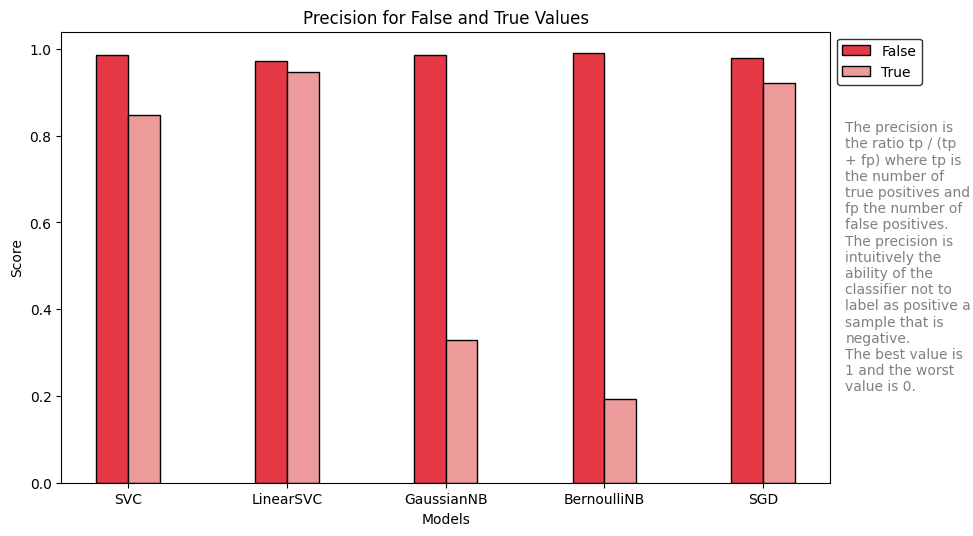

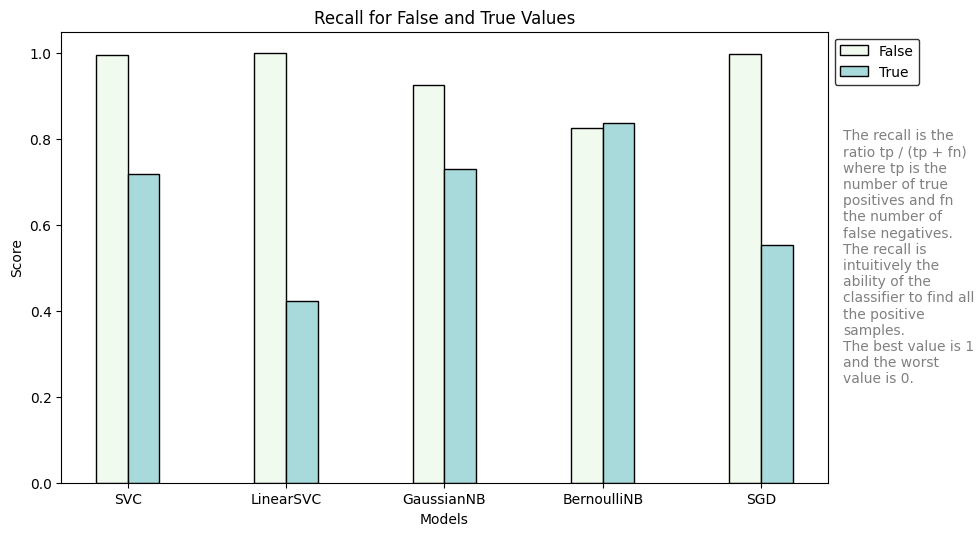

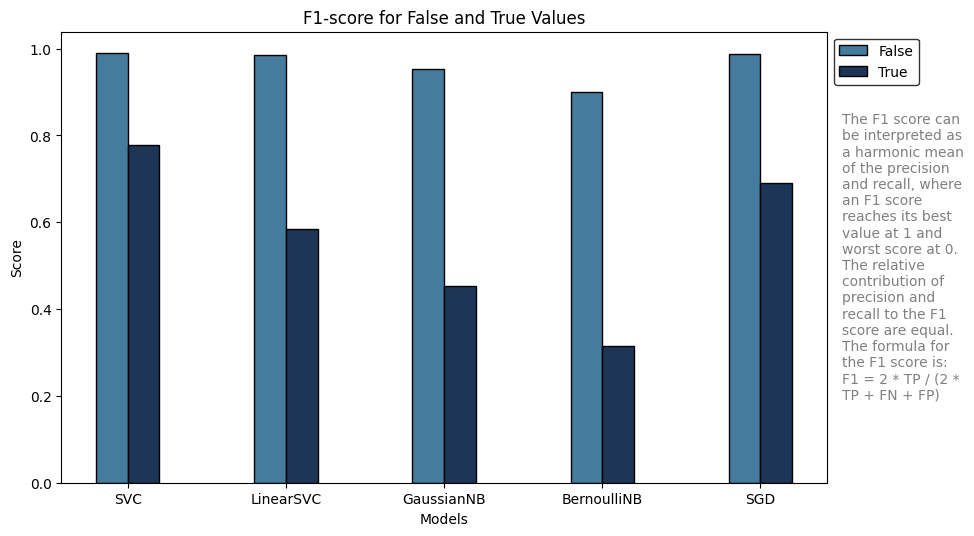

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Define hex codes for each combination of metric and label
colors = {
    'Precision: False': '#e63946',
    'Precision: True': '#ec9a9a',
    'Recall: False': '#f1faee',
    'Recall: True': '#a8dadc',
    'F1-score: False': '#457b9d',
    'F1-score: True': '#1d3557',
}

bar_width = 0.2
bar_positions = np.arange(len(model_names))

metrics = ['precision', 'recall', 'f1-score']

descriptions = {
    'precision': "The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.\nThe best value is 1 and the worst value is 0.",
    'recall': "The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.\nThe best value is 1 and the worst value is 0.",
    'f1-score': "The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:\nF1 = 2 * TP / (2 * TP + FN + FP)"
}

for metric in metrics:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for label in ['False', 'True']:
        key = f'{label.capitalize()}'  # Simplified legend label
        values = [metrics_dict[metric][model][label] for model in model_names]
        x_positions = bar_positions + (label == 'True') * bar_width  # Use boolean condition for x-coordinate calculation
        ax.bar(x_positions, values, width=bar_width, 
               label=key, color=colors[f'{metric.capitalize()}: {label.capitalize()}'], edgecolor='black')

    ax.set_xticks(bar_positions + bar_width / 2)
    ax.set_xticklabels(model_names)
    ax.set_xlabel('Models')
    ax.set_ylabel('Score')
    ax.set_title(f'{metric.capitalize()} for False and True Values')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), edgecolor='black')

    # Add text description under the legend with adjusted layout
    ax.text(1.02, 0.5, descriptions[metric], transform=ax.transAxes, va='center', ha='left', fontsize=10, color='gray', wrap=True)

    plt.tight_layout(pad=3.0)
    
    # Save the plot
    plt.savefig(f'{metric}_plot.png')

    # Display the plot
    plt.show()

# Website Integration/Results Analysis

In [18]:
from joblib import dump

In [19]:
X_test_website_integration
dump(X_test_website_integration, 'X_test_website_integration.joblib')

['X_test_website_integration.joblib']

In [20]:
y_test_website_integration
dump(y_test_website_integration, 'y_test_website_integration.joblib') 

['y_test_website_integration.joblib']

In [21]:
df
dump(df, 'df.joblib')

['df.joblib']

In [22]:
svc_model
dump(svc_model, 'svc_model.joblib')

['svc_model.joblib']

In [23]:
test_indexes = pd.DataFrame(y_test_website_integration).index
website_df = pd.DataFrame()
for index in test_indexes:
    website_df = website_df._append(df.loc[index])
website_df = website_df.reset_index(drop=True)
display(website_df)

,FlareNumber,T_REC,NOAA_AR,QUALITY,Longitude,Latitude,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,AREA_ACR,TOTFZ,MEANPOT,R_VALUE,EPSZ,SHRGT45,MEANSHR,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZH,TOTFY,MEANJZD,MEANALP,TOTFX,EPSY,EPSX
0,0,1/28/2015 23:48,12269,0,36,7,445.780,7.540000e+09,3.054242e+22,1.106860e+13,34.712,1.169640e+12,1.010636e+22,314.729095,-1630.400,1278.664,2.061,-0.4102,1.368,22.536,25.925,94.478,94.742,32.060,-0.001930,-513.360,-0.126242,-0.009131,-2053.10,0.0646,0.2583
1,0,1/5/2018 21:00,12693,0,40,18,42.265,1.516200e+09,3.081169e+21,9.679010e+11,2.126,6.298580e+11,9.794837e+20,19.672789,-351.540,1444.633,2.487,-0.4398,1.121,20.469,24.405,107.781,106.822,32.552,0.001324,-119.640,-0.771470,0.005226,-376.46,0.0748,0.2355
2,0,3/27/2017 23:48,12643,0,2,8,36.978,1.146400e+09,1.892251e+21,8.986410e+11,1.563,3.085050e+11,5.358281e+20,85.322609,75.539,1465.885,0.000,0.1250,4.630,22.257,29.586,123.586,125.577,48.396,0.001608,-246.750,0.605744,0.008141,-127.55,0.2041,0.1055
3,0,2/28/2014 23:48,11987,0,4,3,2859.418,6.658200e+10,3.496330e+23,5.967480e+13,283.737,1.607430e+13,3.402889e+22,2459.020020,-1200.900,4812.787,4.105,-0.0342,21.259,31.989,40.904,120.552,122.188,61.177,-0.005187,-7170.600,0.569204,-0.014695,6036.30,0.1021,-0.0860
4,0,6/11/2013 23:48,11765,0,50,9,429.116,9.528200e+09,4.894077e+22,9.364230e+12,7.160,1.103120e+12,1.093061e+22,166.980591,-2408.000,2005.428,3.466,-0.4794,5.224,21.008,25.851,73.417,73.283,27.145,-0.000390,-118.200,-0.110685,-0.001470,-1907.90,0.0118,0.1899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,0,10/15/2011 23:48,11314,0,9,26,3226.744,6.969300e+10,8.212280e+23,6.657840e+13,6.755,1.403260e+13,3.621683e+22,2651.754150,990.860,10330.510,4.557,0.0270,39.018,41.819,51.969,109.055,111.775,66.065,0.000113,-5252.800,0.448319,0.000263,1508.80,0.0715,-0.0205
1771,0,2/23/2016 21:36,12504,0,44,13,35.237,1.327600e+09,2.132734e+21,8.224470e+11,8.936,6.485780e+11,9.229115e+20,16.534487,-311.540,1053.754,0.000,-0.4451,0.131,19.492,23.738,86.008,86.644,29.586,0.005863,-72.352,-0.824624,0.023644,-333.52,0.0517,0.2383
1772,0,2/22/2015 23:48,12287,0,18,14,299.052,4.055100e+09,2.349214e+22,7.022800e+12,43.868,1.992610e+12,4.576429e+21,217.179581,-719.090,2152.242,2.074,-0.3364,11.376,28.322,34.890,116.281,116.384,47.907,-0.005338,-514.220,0.207541,-0.021856,-936.76,0.1203,0.2191
1773,0,1/26/2013 23:48,11661,0,20,15,265.367,5.015700e+09,1.610164e+22,5.160300e+12,14.977,1.453950e+12,3.067778e+21,255.519119,-102.110,2657.677,1.799,-0.0386,5.633,24.498,34.668,150.857,149.085,75.751,0.003283,-1028.900,0.625023,0.009749,576.48,0.1946,-0.1090


In [24]:
#Should occur on click of a button perchance?
from random import randrange

def randomize_sample():
    random_idx = randrange(0, len(website_df.index))
    print(random_idx)

randomize_sample()

1182


In [25]:
total_incorrect = 0
total_correct = 0

for idx in website_df.index:
    
    actual_str = "was NOT"
    curr_data = website_df.loc[idx]
    if curr_data["FlareNumber"]==1:
        actual_str = "WAS"

    output_str = "will NOT"
    svc_y_curr_pred = svc_model.predict(X_test_website_integration[idx].reshape(1, -1))
    if svc_y_curr_pred:
        output_str = "WILL"
    
    date_text = f"It is currently {curr_data["T_REC"].split()[0]}"
    output = f"Based on solar data from the past 48 hours, we PREDICT there {output_str} be a solar flare today"
    actual = f"There {actual_str} a solar flare measured on this day!"

    prediction_correct_string = "Prediction was incorrect"
    if (output_str=="will NOT" and actual_str=="was NOT") or (output_str=="WILL" and actual_str=="WAS"):
        prediction_correct_string = "PREDICTION WAS CORRECT!"
        total_correct+=1
    else:
        total_incorrect+=1

    print(date_text)
    print(output)
    print(actual)
    print(prediction_correct_string)

    

total_incorrect_string = f"Total Incorrect Across Test Data: {total_incorrect}"
total_correct_string = f"Total Correct Across Test Data: {total_correct}"
percentage_string = f"{total_incorrect/total_correct*100:.4f}% of Guesses Were Incorrect"

print(total_incorrect_string)
print(total_correct_string)
print(percentage_string)

It is currently 1/28/2015
Based on solar data from the past 48 hours, we PREDICT there will NOT be a solar flare today
There was NOT a solar flare measured on this day!
PREDICTION WAS CORRECT!
It is currently 1/5/2018
Based on solar data from the past 48 hours, we PREDICT there will NOT be a solar flare today
There was NOT a solar flare measured on this day!
PREDICTION WAS CORRECT!
It is currently 3/27/2017
Based on solar data from the past 48 hours, we PREDICT there will NOT be a solar flare today
There was NOT a solar flare measured on this day!
PREDICTION WAS CORRECT!
It is currently 2/28/2014
Based on solar data from the past 48 hours, we PREDICT there will NOT be a solar flare today
There was NOT a solar flare measured on this day!
PREDICTION WAS CORRECT!
It is currently 6/11/2013
Based on solar data from the past 48 hours, we PREDICT there will NOT be a solar flare today
There was NOT a solar flare measured on this day!
PREDICTION WAS CORRECT!
It is currently 12/3/2013
Based on s